## Movie Sentiment Analysis

**Importing libraries**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Importing dataset**

In [30]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [31]:
df.shape

(50000, 2)

**Check if null values are present**

In [33]:
print(df['review'].isnull().sum())
print(df['sentiment'].isnull().sum())

0
0


In [34]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

**Count of positive and negative tuples**

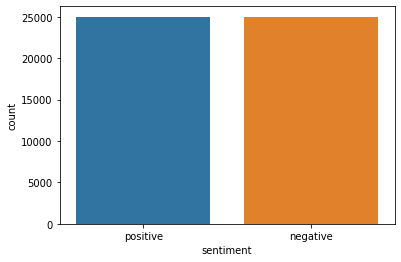

In [35]:
sns.countplot(x = df['sentiment'])

**Encode label**

In [36]:
df['sentiment'] = pd.get_dummies(df['sentiment'], drop_first=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


**Split feature and label**

In [40]:
x = df['review'].values
y = df['sentiment'].values

**Preprocess text**

Removal of non-alphabet characters, convert to lower case, removal of stop words and perform stemming 

In [41]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [43]:
sw = set(stopwords.words('english')) # Set of english stop words
for i in range(0, len(x)):
  comment = re.sub('[^a-zA-Z]', ' ', x[i])
  comment = comment.lower()
  comment = comment.split()
  comment = [ps.stem(word) for word in comment if word not in sw]
  comment = ' '.join(comment)
  x[i] = comment

**TFID Vectorization**

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features=5000)
X = vec.fit_transform(x).toarray()

In [48]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Train-Test splitting**

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Model building**

In [50]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Predict output**

In [51]:
y_pred = clf.predict(x_test)

**Statistics**

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6291
           1       0.84      0.86      0.85      6209

    accuracy                           0.85     12500
   macro avg       0.85      0.85      0.85     12500
weighted avg       0.85      0.85      0.85     12500



In [58]:
print(confusion_matrix(y_test, y_pred))

[[5273 1018]
 [ 893 5316]]


**Accuracy is 85%**